<a href="https://colab.research.google.com/github/conormj14/conormj14/blob/main/DV360_Reach_Overlap_AI_Powered_Analysis_2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WELCOME TO THE AI POWERED DV360 Reach Overlap Analysis Notebook**

# Analysis Filters

In [ ]:
CLIENT_NAME = "Youi" #@param {type:"string"}
YOUR_NAME = 'Conor' #@param {type:"string"}
RECEIVER_NAME = 'Matt' #@param {type:"string"}
GOOGLE_SHEET_NAME = "Youi_UR_Overlap_Report_-_VIDEO_STRATEGY_FY25_Q4_example"  #@param {type:"string"}
INCLUDE_ROWS_CONTAINING = 'Youtube'  #@param {type:"string"}
INCLUDE_COLS_CONTAINING = 'Peacock'  #@param {type:"string"}
EXCLUDE_ROWS_CONTAINING = '' #@param {type:"string"}
EXCLUDE_COLS_CONTAINING = '' #@param {type:"string"}
#set the below filter to Insertion Order or Advertiser
COMPARISON_DIMENSION = 'Insertion Order' # @param ["Insertion Order", "Advertiser"]
BAR_CHARTS_WIDTH_IN_PIXELS = 1800 #@param {type:"integer"}
BAR_CHARTS_HEIGHT_IN_PIXELS  = 1000 #@param {type:"integer"}
ALL_IOs_HEATMAP_SIZE = 'Small' # @param ["Small", "Medium", "Large"]
FILTERED_IOS_HEATMAP_SIZE = 'Small' # @param ["Small", "Medium", "Large"]
VENN_DIAGRAM_IO_ONE = "7Plus - OP24145 Youi - Digital PG April - June FF" #@param {type:"string"}
VENN_DIAGRAM_IO_TWO = "PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU" #@param {type:"string"}

## Interactive Trix & Packages

In [ ]:
# @title
#importing pandas
#importing sheets package from the colab library and defining your sheet
#make sure to edit the name of the google_sheet_name variable below and that the sheet generates correctly below
from google.colab import auth
auth.authenticate_user()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import sheets
from datetime import datetime
from IPython.display import display, Markdown
import numpy as np


current_date = datetime.now()
formatted_date = current_date.strftime("%d/%m/%y")
#change the value of this variable to be the exact name of your downloaded report in sheets
google_sheet_name = GOOGLE_SHEET_NAME

sheet = sheets.InteractiveSheet(title=google_sheet_name)
sheet


https://docs.google.com/spreadsheets/d/1pYCrCbXx1b4rtZSiporXTZhq3GxNqu9Tf0Z9VdcXAWU/edit#gid=558502463


## Dataframe & Helper Functions

In [ ]:
# @title
#converting sheet object to a pandas dataframe
df = sheet.as_df()

#print(df.columns)

def set_dtypes(df):
  dimension_cols = ['Partner', 'Partner ID', 'Country', 'Advertiser', 'Advertiser ID', 'Insertion Order', 'Insertion Order ID']
  for col in df.columns:
    if col not in dimension_cols:
      #print(df[col])
      df[col] = pd.to_numeric(df[col], errors='coerce')
      df[col] = df[col].replace('-', 0) # Changed to 0 for numeric columns
  return df


def overlap_col_cleaner(df):
  '''Docstring: This function takes in a Dataframe truncates the irrelevant parts of the column names and then replaces any hyphenated values where no reach overlap was observed to a 0.0 float data type. Ouput: Dataframe'''
  new_col_list = []

  for col in df.columns:
    col = col.split(':')[0]
    new_col_list.append(col)

  df.columns = new_col_list

  df = df.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('-', '0.0', regex=False), errors='coerce'))

  return df

#defining a function to filter insertion order names for a given input string so that users can focus the analysis on one part of a clients activity based on their naming conventions


def filter_io_rows(df, row_filter, rows_to_exclude=None):
    if row_filter == '':
        filtered_df = df
    else:
        mask = df.index.str.contains(row_filter)
        filtered_df = df[mask]

    if rows_to_exclude:
        exclude_mask = filtered_df.index.str.contains(rows_to_exclude)
        filtered_df = filtered_df[~exclude_mask]

    return filtered_df


def filter_io_cols(df, col_filter, cols_to_exclude=None):

  if col_filter == '':
        filtered_df = df

  elif col_filter:
    filtered_df = df.filter(like=col_filter)

  if cols_to_exclude:
    cols = [col for col in filtered_df.columns if cols_to_exclude not in col]
    filtered_df = filtered_df[cols]

  return filtered_df

def clean_dataframe(df, metadata_identifier="Report Time:"):
  """
  Cleans the dataframe by dropping rows containing report metadata.

  Args:
    df: The input pandas DataFrame.
    metadata_identifier: A string that identifies the start of
                         metadata rows. Defaults to "Report Time:".

  Returns:
    A cleaned pandas DataFrame with report metadata rows removed.
  """
  # Drop columns with empty string as name
  df = df.drop(columns=[''], errors='ignore')

  # Find the index of the row containing the metadata identifier
  metadata_index = df[df.iloc[:, 0].astype(str) == metadata_identifier].index[0]

  # Drop rows starting from the metadata index
  cleaned_df = df.drop(df.index[metadata_index:])

  # Replace empty strings with NaN
  cleaned_df = cleaned_df.replace('', np.nan)

  # Drop rows with all NaN values
  cleaned_df = cleaned_df.dropna(how='all')

  return cleaned_df




# Apply the function to your DataFrame
if (df['Partner']=='Report Time:').any():
 df = clean_dataframe(df, metadata_identifier="Report Time:")
else:
  pass


#cleaning df by making sure every column has the right dtypes

df = set_dtypes(df)

df = df.fillna(0)

df.head()

,Partner,Partner ID,Country,Advertiser,Advertiser ID,Insertion Order ID,Insertion Order,Unique Reach: Duplicate Total Reach,Unique Reach: Exclusive Total Reach,570248 - SBS - Direct//DV360 -Youi April Activity - (Video - AllPlatforms) - Programmatic Guaranteed - April 2025: Unique Reach: Overlap Total Reach,...,PG-9-DV-Direct-Youi-9NowAprGE-20250401.TAU: Unique Reach: Overlap Total Reach,PG-9-DV-Direct-Youi-9NowAprGE-20250401.TAU: Unique Reach: Overlap Total Reach Percent,PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU: Unique Reach: Overlap Total Reach,PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU: Unique Reach: Overlap Total Reach Percent,PG-KAYO-FOXA-BIN-IND-DV360-YOUI-BAU-APRIL-1530-250424.ADX: Unique Reach: Overlap Total Reach,PG-KAYO-FOXA-BIN-IND-DV360-YOUI-BAU-APRIL-1530-250424.ADX: Unique Reach: Overlap Total Reach Percent,Ten 15sec April FW_Order_VIA-156-00358: Unique Reach: Overlap Total Reach,Ten 15sec April FW_Order_VIA-156-00358: Unique Reach: Overlap Total Reach Percent,Ten 30sec April FW_Order_VIA-156-00359: Unique Reach: Overlap Total Reach,Ten 30sec April FW_Order_VIA-156-00359: Unique Reach: Overlap Total Reach Percent
0,Youi AU c/o MightyHive AUNZ - DV360 - APAC,1069136,AU,Youi AU,1090443,1020576963,Ten 30sec April FW_Order_VIA-156-00359,322647,207625,45303,...,11995,0.02,32181,0.06,37458,0.07,221282,0.42,530272,1.00
1,Youi AU c/o MightyHive AUNZ - DV360 - APAC,1069136,AU,Youi AU,1090443,1020612495,7Plus - OP24064 Youi - Digital PG April Video ...,339067,691080,92970,...,30528,0.03,73738,0.07,80083,0.08,78712,0.08,108966,0.11
2,Youi AU c/o MightyHive AUNZ - DV360 - APAC,1069136,AU,Youi AU,1090443,1020636758,570248 - SBS - Direct//DV360 -Youi April Activ...,218955,384198,603153,...,13145,0.02,42900,0.07,39372,0.07,35715,0.06,45303,0.08
3,Youi AU c/o MightyHive AUNZ - DV360 - APAC,1069136,AU,Youi AU,1090443,1020638582,7Plus - OP24145 Youi - Digital PG April - June FF,42007,48398,16925,...,2084,0.02,13386,0.15,8996,0.10,7391,0.08,9990,0.11
4,Youi AU c/o MightyHive AUNZ - DV360 - APAC,1069136,AU,Youi AU,1090443,1020639125,571008 - SBS - Direct//DV360 -Youi - April Act...,63167,109393,28482,...,5425,0.03,7738,0.04,8156,0.05,9575,0.06,15140,0.09


####Model Configuration

In [ ]:
# @title
from google import genai
#import pandas as pd
from google.genai import types

from google.colab import userdata
#creds = userdata.get('GOOGLE_API_KEY')
creds = ''

##model = genai.GenerativeModel('gemini-2.0-pro-exp-02-05')
#model = genai.GenerativeModel('gemini-2.0-flash-thinking-exp-01-21')
#model = genai.GenerativeModel('gemini-2.0-flash')


client = genai.Client(api_key=creds)

sys_instruct = f"""You are a highly experienced DV360 Specialist. You specialize in crafting and optimizing programmatic advertising strategies that directly drive incremental sales. You have a deep understanding of the digital advertising landscape.

Expertise: Advanced knowledge of programmatic advertising, DV360 platform, audience targeting, campaign optimization, and data analysis. Proven ability to drive incremental sales and demonstrate ROI.

Keep in mind when preparing insights that reach cannot be summed.  High Overlap (Duplicate Reach) is good for building frequency, whereas low overlap (Exclusive Reach) is good for building reach.

Be assertive and confident but approachable and conversational. Use clear, concise language. Aim for a tone that conveys authority and trustworthiness.  Write succinctly and condense paragraphs avoiding jargon or overly formal language.

Ensure output includes:

- A brief introduction that summarizes purpose.
- A bullet-point list of key findings or recommendations.



When prompt starts with "--" please refine the text provided using the above information."""


Reach Overlap Venn Diagram (IO_1 vs IO_2)

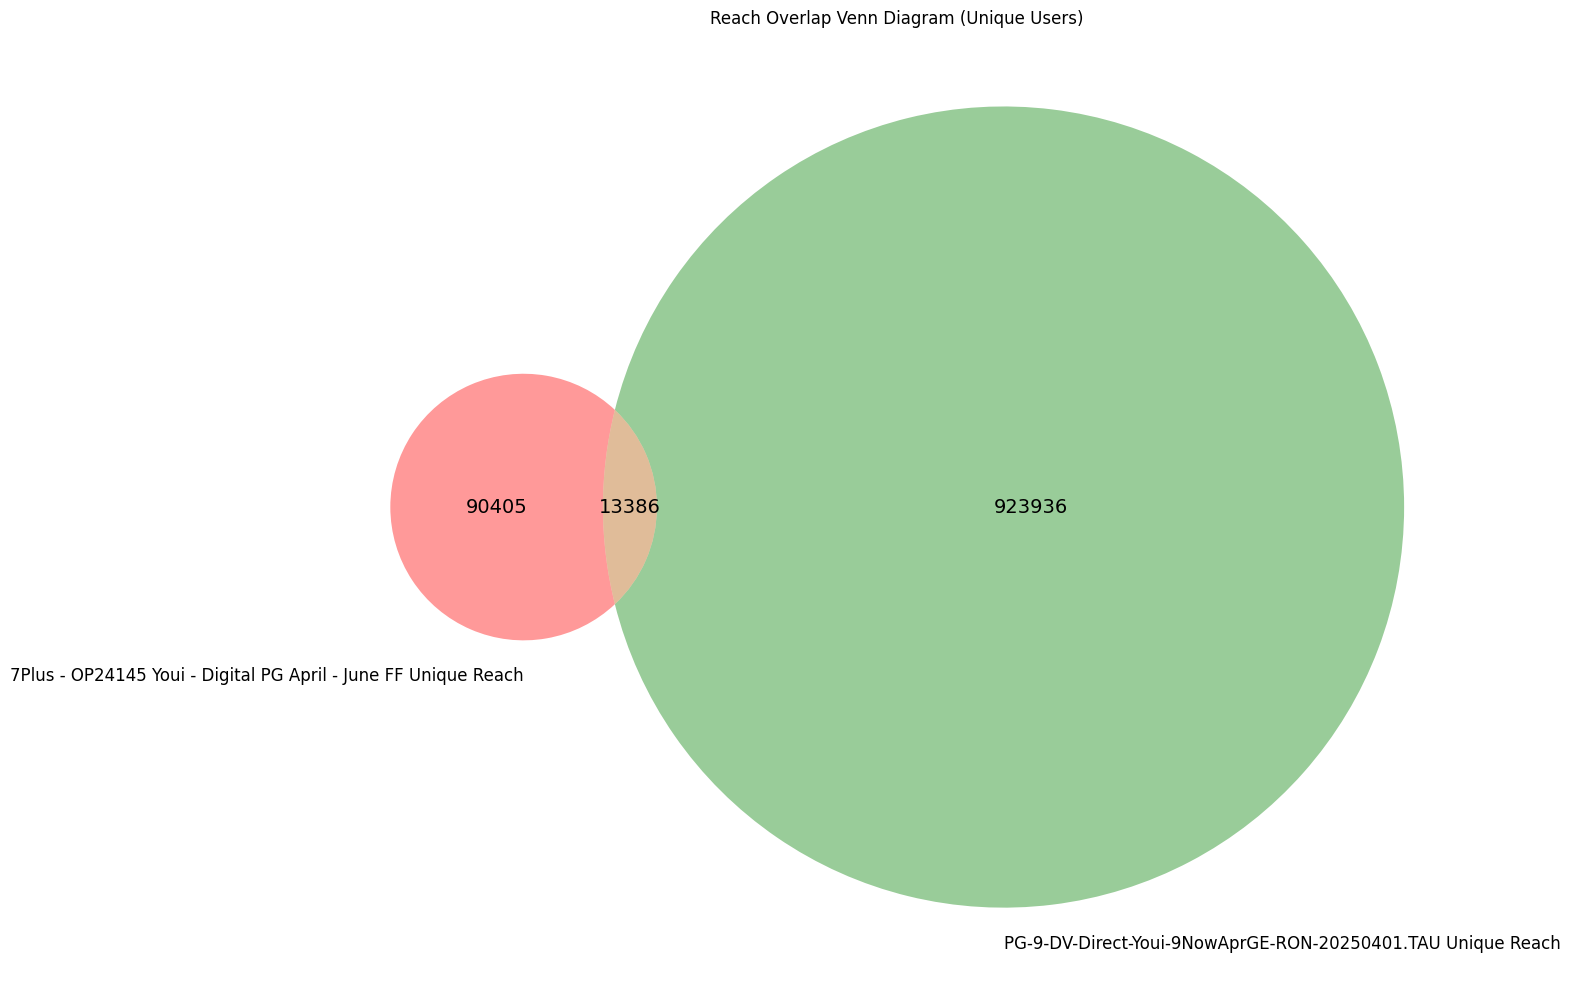

In [ ]:
# @title
if VENN_DIAGRAM_IO_ONE != '' and VENN_DIAGRAM_IO_TWO != '':
  io_1 = VENN_DIAGRAM_IO_ONE
  io_2 = VENN_DIAGRAM_IO_TWO

  try:
    vd_metrics_df = df[df['Insertion Order'].isin([io_1, io_2])][['Insertion Order','Unique Reach: Duplicate Total Reach', 'Unique Reach: Exclusive Total Reach', io_1 + ': Unique Reach: Overlap Total Reach', io_2 + ': Unique Reach: Overlap Total Reach']]
    vd_metrics_df['Unique Reach'] = vd_metrics_df['Unique Reach: Duplicate Total Reach'] + vd_metrics_df['Unique Reach: Exclusive Total Reach']
    vd_metrics_df = vd_metrics_df.rename(columns={'Unique Reach: Duplicate Total Reach': 'Duplicate Total Reach', 'Unique Reach: Exclusive Total Reach': 'Exclusive Total Reach', io_1 + ': Unique Reach: Overlap Total Reach': io_1 + ': Overlap Reach',io_2 + ': Unique Reach: Overlap Total Reach':  io_2 + ': Overlap Reach' })
    vd_metrics_df = vd_metrics_df.drop(columns=['Duplicate Total Reach', 'Exclusive Total Reach'])

    io_1_df = vd_metrics_df[vd_metrics_df['Insertion Order'] == io_1]
    io_2_df = vd_metrics_df[vd_metrics_df['Insertion Order'] == io_2]

    from matplotlib_venn import venn2
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15,15))

    set_a = io_1_df['Unique Reach'].sum()
    set_b = io_2_df['Unique Reach'].sum()
    set_c = io_1_df[io_2 + ': Overlap Reach'].sum()

    v = venn2(subsets=(set_a,set_b,set_c), set_labels=(io_1+' Unique Reach',io_2+' Unique Reach', 'Reach Overlap'))

    # Customize labels
    for text in v.set_labels:
        text.set_fontsize(12)
    #these are the numbers in the circles
    for text in v.subset_labels:
        if text:
            text.set_fontsize(14)


    plt.title('Reach Overlap Venn Diagram (Unique Users)')
    plt.show()

  except KeyError as e:
    #handling key errors that may arise from the fact that the venn diagram filter input cannot be found in the sheet
    print("Could not find the value(s) of VENN_DIAGRAM_IO_ONE and/or VENN_DIAGRAM_IO_TWO filters within the google sheet. Please ensure these values exactly match (case sensitive) what is in your 'Insertion Order' or 'Advertiser' column of your sheet before re-running.")
    print("You can also run the cells below if you wish to skip this part of the analysis or simply leave the venn diagram filters blank and run all cells again")
    print(f"Invalid input. Details: {e}")



## Venn Diagram Gemini AI Insights

In [ ]:
# @title

try:
  if VENN_DIAGRAM_IO_ONE != '' and VENN_DIAGRAM_IO_TWO != '':
    csv_data = vd_metrics_df.to_csv(index=False)

    prompt = f"""
    Analyze the following DV360 reach overlap data:
    {csv_data}

    There are three sets as defined by the following code:

    io_1_df = vd_metrics_df[vd_metrics_df['Insertion Order'] == io_1]
    io_2_df = vd_metrics_df[vd_metrics_df['Insertion Order'] == io_2]

    set_a = io_1_df['Unique Reach'].sum()
    set_b = io_2_df['Unique Reach'].sum()
    set_c = io_1_df[io_2 + ' Overlap Total Reach'].sum()

    v = venn2(subsets=(set_a,set_b,set_c), set_labels=(io_1+' Unique Reach',io_2+' Unique Reach', 'Reach Overlap'))

    Note that you cannot just add the unique reach values of each set. Write concise insights into this data.

    """

    response = client.models.generate_content(
      model="gemini-2.0-flash",
      config=types.GenerateContentConfig(
          system_instruction=sys_instruct),
      contents=prompt)

    #response = model.generate_content(prompt)
    vd_insights = response.text
    print(vd_insights)
except NameError as e:
  print('Cannot find data for venn diagram comparison. Please check the data for the two insertion orders you wish to compare is in your sheet and that the names of these are exactly matching in the notebook venn diagram filters')
  print(f"Invalid input. Details: {e}")

Here's an analysis of the reach overlap data, focusing on key insights and actionable recommendations:

**Summary:** This analysis examines the reach overlap between the "7Plus - OP24145 Youi - Digital PG April - June FF" Insertion Order (IO) and the "PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU" line item to understand audience duplication and inform campaign optimization.

**Key Findings & Recommendations:**

*   **Significant Reach Duplication:** There is a reach overlap of 90,405 users between the "7Plus" IO and the "PG-9" line item. This indicates that a portion of the audience is being exposed to ads from both the IO and the line item.
*   **"PG-9" Line Item Drives Unique Reach:** The "PG-9" line item has a unique reach of 923,936 users. The "7Plus" IO has a unique reach of 90,405.
*   **Evaluate Overlap ROI** Determine the conversion rate of the overlapping users, if the conversion rate is high the overlap is likely beneficial due to increased frequency. If the conversion rate

### Underlying Venn Diagram Data


In [ ]:
# @title

try:
  overlap_heatmap_df = df.set_index(COMPARISON_DIMENSION)\
  .filter(like='Percent', axis=1)

  exclusive_reach_df = df.set_index(COMPARISON_DIMENSION)\
  .filter(like='Exclusive', axis=1)

  duplicate_reach_df = df.set_index(COMPARISON_DIMENSION)\
  .filter(like='Duplicate', axis=1)

  if VENN_DIAGRAM_IO_ONE != '' and VENN_DIAGRAM_IO_TWO != '':
    display(vd_metrics_df)
except KeyError as e:
    #handling key errors that may arise from missing 'Insertion Order' or 'Advertiser' errors
    print('Could not find the Insertion Order and/or Advertiser columns in your sheets')
    print(f"Invalid input. Details: {e}")




,Insertion Order,7Plus - OP24145 Youi - Digital PG April - June FF: Overlap Reach,PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU: Overlap Reach,Unique Reach
3,7Plus - OP24145 Youi - Digital PG April - June FF,90405,13386,90405
7,PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU,13386,923936,923936


#Exclusive Reach

In [ ]:
# @title
import plotly.express as px

try:
  #Create the bar plot
  fig = px.bar(df, x=COMPARISON_DIMENSION, y='Unique Reach: Exclusive Total Reach', color='Unique Reach: Exclusive Total Reach', title=COMPARISON_DIMENSION + ' Exclusive Reach', width=BAR_CHARTS_WIDTH_IN_PIXELS, height=BAR_CHARTS_HEIGHT_IN_PIXELS, color_continuous_scale='darkmint')
  fig.show()
except ValueError as e:
    #handling key errors that may arise from missing 'Insertion Order' or 'Advertiser' errors
    print('Could not find the Insertion Order and/or Advertiser values within those columns in your sheets')
    print(f"Invalid input. Details: {e}")

##Gemini AI Exclusive Reach Insights

In [ ]:
# @title

try:
  ri_exclusive_reach_df = exclusive_reach_df.reset_index(names='Insertion Order')

  csv_data = ri_exclusive_reach_df.to_csv(index=False)

  prompt = f"""
  Analyze the following DV360 exclusive reach data:
  {csv_data}

  Each of the numerical data in the cells of this csv is representing the exclusive reach that an advertising buy resulted in.

  Higher exclusive reach values can be good if an advertiser wants to increase their overall unique reach.

  Write some insights into this data and give suggestions on budget optimisation based on the level of exclusive reach between insertion orders.

  """

  response = client.models.generate_content(
      model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
          system_instruction=sys_instruct),
      contents=prompt)


  exc_reach_insights = response.text
  print(exc_reach_insights)
except NameError as e:
  print('Cannot find Unique Reach: Exclusive Reach data within your sheet')
  print(f"Invalid input. Details: {e}")

Okay, I've analyzed the exclusive reach data you provided for your DV360 insertion orders. Here's a breakdown of key findings and recommendations for optimizing your budget:

**Summary:** This analysis identifies the insertion orders delivering the most exclusive reach, which is crucial for expanding your audience and minimizing wasted impressions. By understanding which buys are most effective at reaching unique users, you can strategically reallocate your budget for maximum impact.

**Key Findings & Recommendations:**

*   **Top Performers for Exclusive Reach:**

    *   **7Plus - OP24064 Youi - Digital PG April Video Lines:** This insertion order significantly outperforms all others, delivering the highest exclusive reach at 691,080.
    *   **PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU:** Also a strong performer, providing 466,316 in exclusive reach.
    *   **570248 - SBS - Direct//DV360 -Youi April Activity - (Video - AllPlatforms) - Programmatic Guaranteed - April 2025:** A s

#Duplicate Reach

In [ ]:
# @title
#Create the bar plot

try:
  fig = px.bar(df, x=COMPARISON_DIMENSION, y='Unique Reach: Duplicate Total Reach', color='Unique Reach: Duplicate Total Reach', title=COMPARISON_DIMENSION + ' Duplicate Reach', width=BAR_CHARTS_WIDTH_IN_PIXELS, height=BAR_CHARTS_HEIGHT_IN_PIXELS,  color_continuous_scale='darkmint')
  fig.show()
except ValueError as e:
    #handling key errors that may arise from missing 'Insertion Order' or 'Advertiser' errors
    print('Could not find the Insertion Order and/or Advertiser values within those columns in your sheets')
    print(f"Invalid input. Details: {e}")

##Gemini AI Duplicate Reach Insights


In [ ]:
# @title

try:
  ri_duplicate_reach_df = duplicate_reach_df.reset_index(names='Insertion Order')
  csv_data = ri_duplicate_reach_df.to_csv(index=False)

  prompt = f"""
  Analyze the following DV360 duplicate reach data:
  {csv_data}

  Each of the numerical data in the cells of this csv is representing the duplicate reach that an advertising buy resulted in.

  Higher duplicate reach values can be good if an advertiser wants to increase their ad frequency but lower duplicate reach values are better for increasing overall advertising reach.

  Write some insights into this data and give suggestions on budget optimisation based on the level of duplicate reach between insertion orders.

  """

  '''response = client.models.generate_content(
      model="gemini-2.0-flash",
      config=types.GenerateContentConfig(
          system_instruction="You are a DV360 marketing analyst at Google"),
      contents=prompt)'''

  response = client.models.generate_content(
      model="gemini-2.0-flash",
      config=types.GenerateContentConfig(
          system_instruction=sys_instruct),
      contents=prompt)

  dup_reach_insights = response.text
  print(dup_reach_insights)
except NameError as e:
  print('Cannot find Unique Reach: Duplicate Reach data within your sheet')
  print(f"Invalid input. Details: {e}")

Here's an analysis of your DV360 duplicate reach data with actionable recommendations:

This analysis identifies opportunities to optimize your DV360 campaigns by examining the duplicate reach across different insertion orders. Understanding where overlap occurs allows for strategic budget allocation to maximize either reach or frequency, depending on your campaign goals.

*   **High Reach, Significant Overlap:**

    *   "PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU" and "7Plus - OP24145 Youi - Digital PG April - June FF" demonstrate substantial reach but potentially high overlap.
    *   Consider reallocating budget from the lower-performing IO to the higher-performing one to improve overall efficiency.

*   **Moderate Reach, Potential for Optimization:**

    *   "Ten 30sec April FW\_Order\_VIA-156-00359", "7Plus - OP24064 Youi - Digital PG April Video Lines", "Ten 15sec April FW\_Order\_VIA-156-00358", and "PG-9-DV-Direct-Youi-9NowAprGE-20250401.TAU" show moderate reach, indicati

# **DV360 Reach Overlap Heatmap** 👐

---



## All Insertion Orders Heatmap

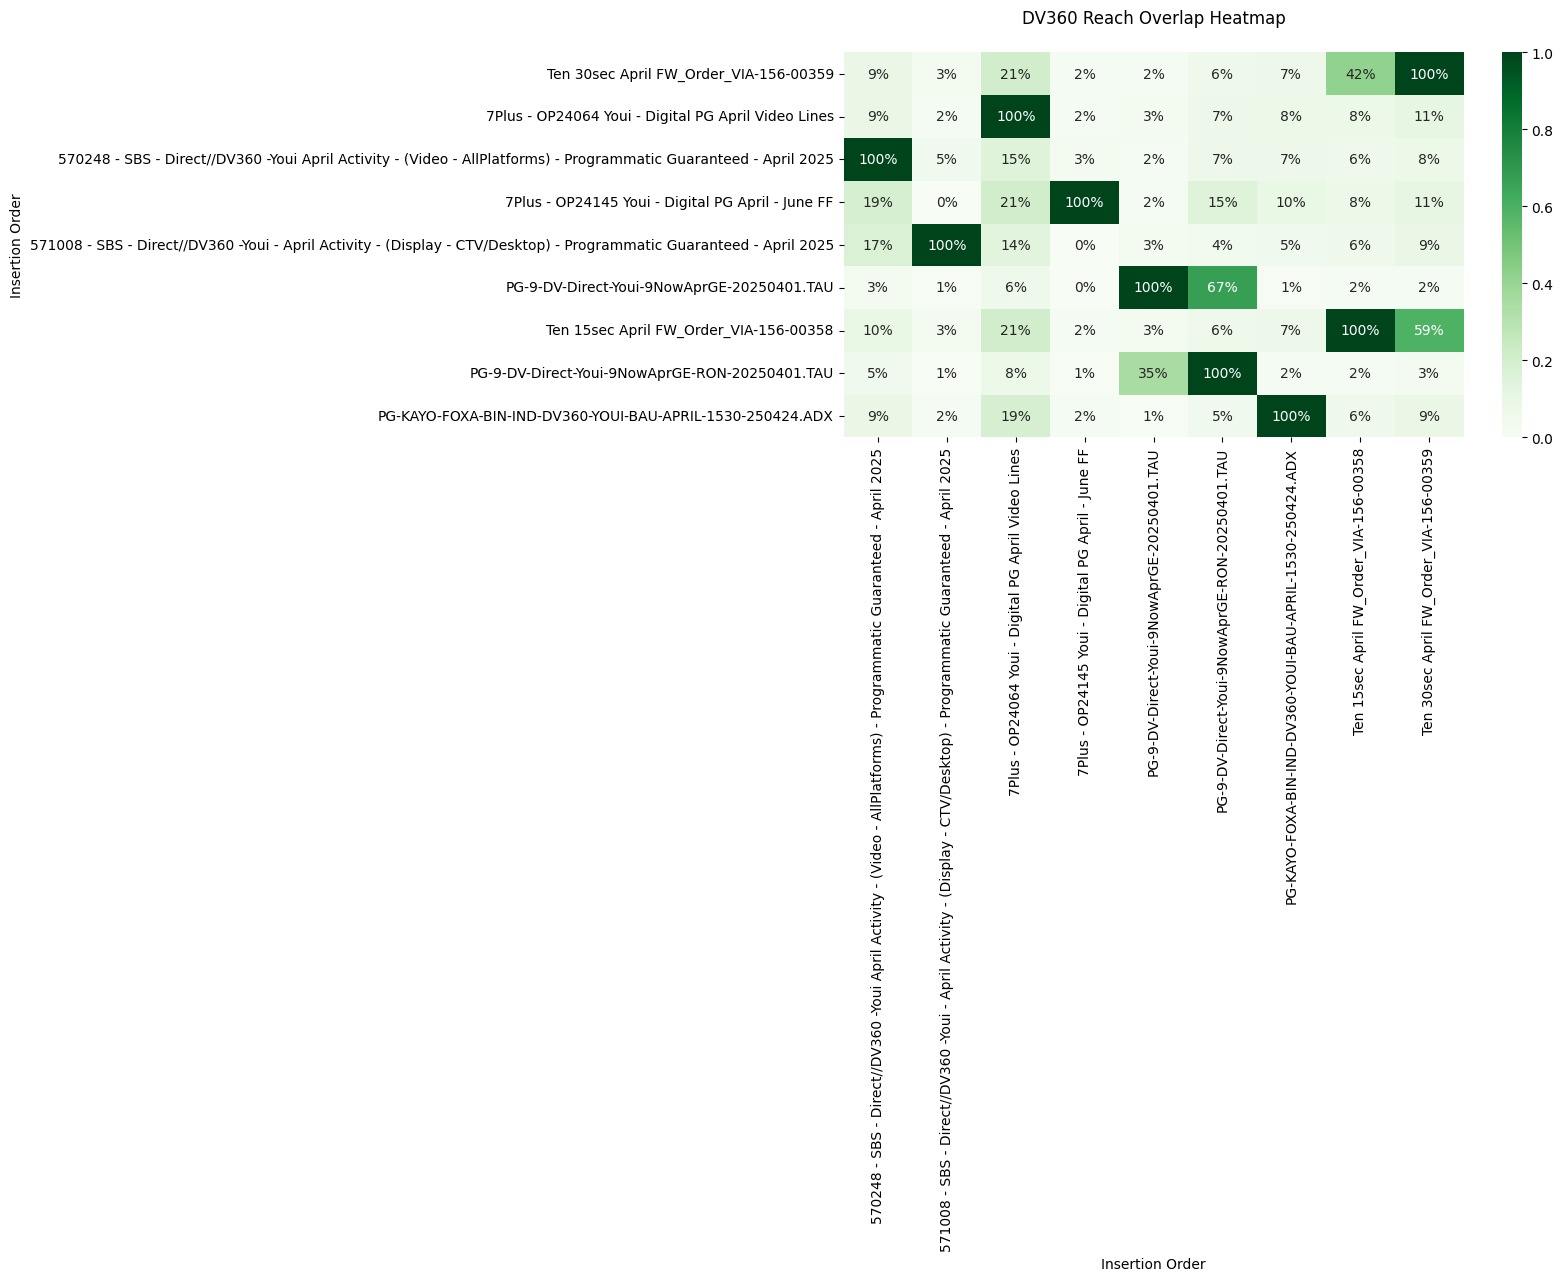

In [ ]:
# @title

try:
  cleaned_df = overlap_col_cleaner(overlap_heatmap_df)

  #control flow for figure size
  if ALL_IOs_HEATMAP_SIZE == 'Small':
    plt.figure(figsize=(10, 5))
  elif ALL_IOs_HEATMAP_SIZE == 'Medium':
    plt.figure(figsize=(20, 10))
  else:
    plt.figure(figsize=(30, 20))

  #generate the heatmap, adjust the figsize parameters below to alter the output e.g plt.figure(figsize=(10, 5)) will generate a heatmap with width 10 inches and height 5 inches
  #plt.figure(figsize=(30,30))
  sns.heatmap(cleaned_df, cmap="Greens", annot=True, fmt=".0%")
  plt.title("DV360 Reach Overlap Heatmap\n")
  plt.xlabel(COMPARISON_DIMENSION)
  plt.ylabel(COMPARISON_DIMENSION)

  #Screenshot the below visualisation into your deck
  plt.show()
except NameError as e:
    #handling key errors that may arise from missing 'Insertion Order' or 'Advertiser' errors
    print('Could not find the Reach Overlap % data within your sheet')
    print(f"Invalid input. Details: {e}")

## Filtered Insertion Orders Heatmap

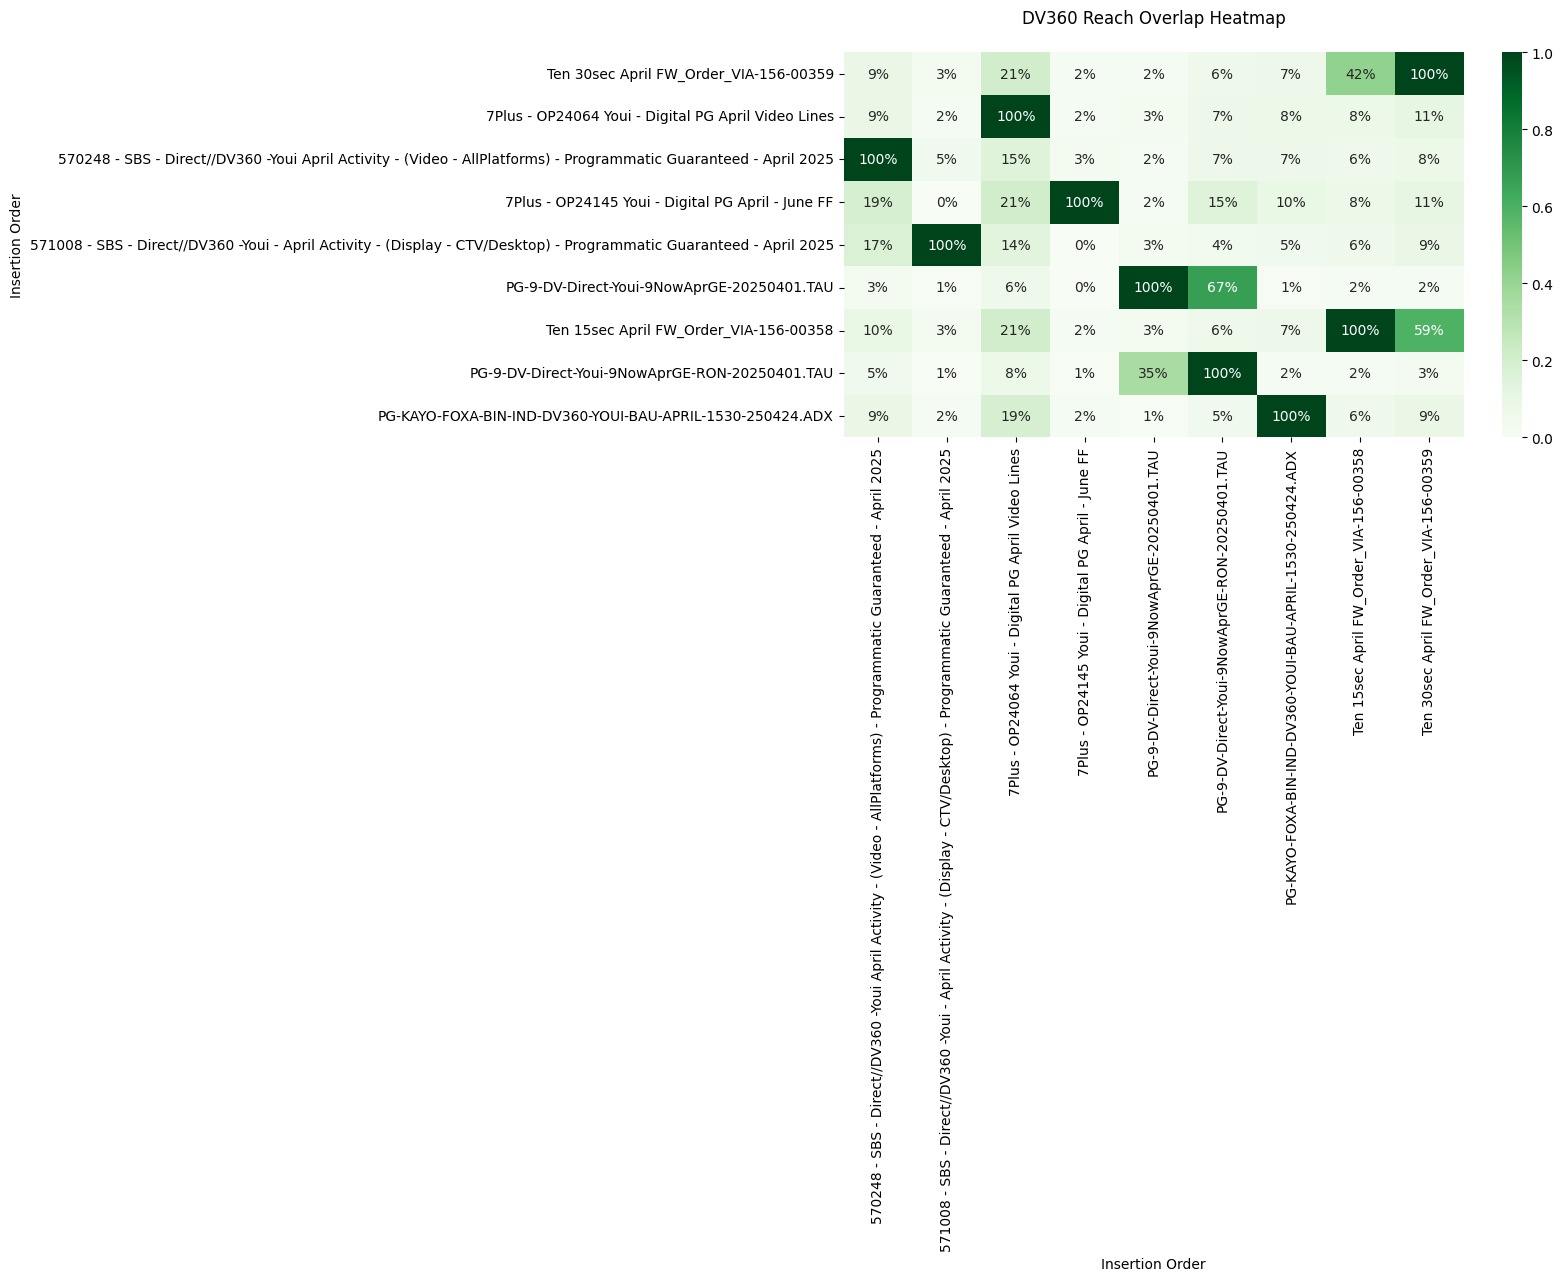

In [ ]:
# @title
try:
  cleaned_df = filter_io_rows(cleaned_df, INCLUDE_ROWS_CONTAINING, EXCLUDE_ROWS_CONTAINING)
  cleaned_df = filter_io_cols(cleaned_df, INCLUDE_COLS_CONTAINING, EXCLUDE_COLS_CONTAINING)

  #control flow for figure size
  if FILTERED_IOS_HEATMAP_SIZE == 'Small':
    plt.figure(figsize=(10, 5))
  elif FILTERED_IOS_HEATMAP_SIZE == 'Medium':
    plt.figure(figsize=(20, 10))
  else:
    plt.figure(figsize=(30, 20))

  #generate the heatmap, adjust the figsize parameters below to alter the output e.g plt.figure(figsize=(10, 5)) will generate a heatmap with width 10 inches and height 5 inches
  #plt.figure(figsize=(20,10))
  sns.heatmap(cleaned_df, cmap="Greens", annot=True, fmt=".0%")
  plt.title("DV360 Reach Overlap Heatmap\n")
  plt.xlabel(COMPARISON_DIMENSION)
  plt.ylabel(COMPARISON_DIMENSION)

  #Screenshot the below visualisation into your deck
  plt.show()
except NameError as e:
  print('Cannot find Reach Overlap % data within your sheet')
  print(f"Invalid input. Details: {e}")


##Gemini AI Reach Overlap Percentage Insights





In [ ]:
# @title

try:
  '''# @title
  import google.generativeai as genai
  import pandas as pd

  from google.colab import userdata
  creds = userdata.get('GOOGLE_API_KEY')

  genai.configure(api_key=creds)

  model = genai.GenerativeModel('gemini-pro')'''

  #data = {'col1': [1, 2, 3, 4, 5], 'col2': ['a', 'b', 'c', 'd', 'e']}
  reach_overlap_df = cleaned_df.reset_index(names='Insertion Order')

  csv_data = reach_overlap_df.to_csv(index=False)

  prompt = f"""
  Analyze the following DV360 reach overlap data:
  {csv_data}

  Each of the numerical data in the cells of this csv is representing percentage values of users that overlap from that insertion order with the column.

  Lower reach overlap percentages can be good if an advertiser wants to increase their overall unique reach whereas higher reach overlap percentages can be good if an advertiser wants to increase their average frequency.

  Insights are most helpful when relevant to common values in the Insertion order names. Write some insights into this data and give suggestions on budget optimisation based on the level of reach overlap between insertion orders.

  """

  response = client.models.generate_content(
      model="gemini-2.0-flash",
      config=types.GenerateContentConfig(
          system_instruction=sys_instruct),
      contents=prompt)

  reach_overlap_insights = response.text
  print(reach_overlap_insights)
except NameError as e:
  print('Cannot not construct the reach overlap dataframe from the data within your sheet and could therefore not send the Gemini API anything')
  print(f"Invalid input. Details: {e}")

Here's an analysis of the provided DV360 reach overlap data, focusing on actionable insights and budget optimization recommendations:

**Key Findings & Recommendations:**

*   **Ten Second Video Campaigns (15s & 30s) Exhibit High Overlap:** The "Ten 15sec April FW\_Order\_VIA-156-00358" and "Ten 30sec April FW\_Order\_VIA-156-00359" campaigns show a substantial 59% overlap.

    *   **Recommendation:** Given this high overlap, consider consolidating budget into the higher-performing (presumably the 30-second) ad to increase efficiency. If the 15-second spot has a significantly lower CPM and strong completion rate, maintain it to reinforce the message delivered in the 30-second spot.

*   **9Now Programmatic Guaranteed Campaigns Show Significant Overlap:** The campaigns "PG-9-DV-Direct-Youi-9NowAprGE-20250401.TAU" and "PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU" have a very high overlap of 67% and 35% respectively.

    *   **Recommendation:** Review the targeting criteria for both 

# Email Report

In [ ]:
# @title

try:
  if VENN_DIAGRAM_IO_ONE != '' and VENN_DIAGRAM_IO_TWO != '':
    io_1 = VENN_DIAGRAM_IO_ONE
    io_2 = VENN_DIAGRAM_IO_TWO

    markdown_email = f"""
    ##DV360 Reach Overlap Analysis: {CLIENT_NAME} - {formatted_date}

    Hi {RECEIVER_NAME},

    Please find below a summary of the DV360 reach overlap analysis conducted for your campaigns. This analysis aims to provide insights into the reach and frequency of your campaigns, and to identify potential optimization opportunities.

    ###1. Venn Diagram Analysis (If Applicable)

    **Insert Venn Diagram visual here**


    {vd_insights}

    ###2. Exclusive Reach Analysis

    **Insert Exclusive Reach visual here**


    {exc_reach_insights}

    ###3. Duplicate Reach Analysis

    **Insert Duplicate Reach visual here**


    {dup_reach_insights}

    ###4. Reach Overlap Percentage Analysis

    **Insert Heatmap visual(s) here**


    {reach_overlap_insights}

    Let me know if you have any questions on the above,

    Thanks,

    {YOUR_NAME}

    """
    display(Markdown(markdown_email))

  else:
    markdown_email = f"""
    ## DV360 Reach Overlap Analysis: {CLIENT_NAME} - {formatted_date}

    Hi {RECEIVER_NAME},

    Please find below a summary of the DV360 reach overlap analysis conducted for your campaigns. This analysis aims to provide insights into the reach and frequency of your campaigns, and to identify potential optimization opportunities.


    ### 1. Exclusive Reach Analysis

    **Insert Exclusive Reach visual here**


    {exc_reach_insights}

    ### 2. Duplicate Reach Analysis

    **Insert Duplicate Reach visual here**


    {dup_reach_insights}

    ### 3. Reach Overlap Percentage Analysis

    **Insert Heatmap visual(s) here**


    {reach_overlap_insights}

    Let me know if you have any questions on the above,

    Thanks,

    {YOUR_NAME}

    """
    display(Markdown(markdown_email))
except NameError as e:
  print('Cannot find one or more of the AI insights')
  print(f"Invalid input. Details: {e}")



    ##DV360 Reach Overlap Analysis: Youi - 08/05/25

    Hi Matt,

    Please find below a summary of the DV360 reach overlap analysis conducted for your campaigns. This analysis aims to provide insights into the reach and frequency of your campaigns, and to identify potential optimization opportunities.

    ###1. Venn Diagram Analysis (If Applicable)

    **Insert Venn Diagram visual here**


    Here's an analysis of the reach overlap data, focusing on key insights and actionable recommendations:

**Summary:** This analysis examines the reach overlap between the "7Plus - OP24145 Youi - Digital PG April - June FF" Insertion Order (IO) and the "PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU" line item to understand audience duplication and inform campaign optimization.

**Key Findings & Recommendations:**

*   **Significant Reach Duplication:** There is a reach overlap of 90,405 users between the "7Plus" IO and the "PG-9" line item. This indicates that a portion of the audience is being exposed to ads from both the IO and the line item.
*   **"PG-9" Line Item Drives Unique Reach:** The "PG-9" line item has a unique reach of 923,936 users. The "7Plus" IO has a unique reach of 90,405.
*   **Evaluate Overlap ROI** Determine the conversion rate of the overlapping users, if the conversion rate is high the overlap is likely beneficial due to increased frequency. If the conversion rate is low, consider excluding the overlapping audience to eliminate wasted impressions.
*   **Optimize Budget Allocation:** If the "PG-9" line item is more efficient at driving conversions or meeting campaign goals, consider shifting budget from the "7Plus" IO to the "PG-9" line item to maximize overall campaign performance.


    ###2. Exclusive Reach Analysis

    **Insert Exclusive Reach visual here**


    Okay, I've analyzed the exclusive reach data you provided for your DV360 insertion orders. Here's a breakdown of key findings and recommendations for optimizing your budget:

**Summary:** This analysis identifies the insertion orders delivering the most exclusive reach, which is crucial for expanding your audience and minimizing wasted impressions. By understanding which buys are most effective at reaching unique users, you can strategically reallocate your budget for maximum impact.

**Key Findings & Recommendations:**

*   **Top Performers for Exclusive Reach:**

    *   **7Plus - OP24064 Youi - Digital PG April Video Lines:** This insertion order significantly outperforms all others, delivering the highest exclusive reach at 691,080.
    *   **PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU:** Also a strong performer, providing 466,316 in exclusive reach.
    *   **570248 - SBS - Direct//DV360 -Youi April Activity - (Video - AllPlatforms) - Programmatic Guaranteed - April 2025:** A solid contributor with 384,198 exclusive reach.
*   **Mid-Range Performers:**

    *   **PG-KAYO-FOXA-BIN-IND-DV360-YOUI-BAU-APRIL-1530-250424.ADX:** Decent reach of 257,605.
    *   **Ten 30sec April FW\_Order\_VIA-156-00359:** Reach of 207,625.
    *   **PG-9-DV-Direct-Youi-9NowAprGE-20250401.TAU:** Reach of 127,138.
    *   **571008 - SBS - Direct//DV360 -Youi - April Activity - (Display - CTV/Desktop) - Programmatic Guaranteed - April 2025:** Reach of 109,393.
    *   **Ten 15sec April FW\_Order\_VIA-156-00358:** Reach of 106,257.
*   **Lower Reach IO's:**
    *   **7Plus - OP24145 Youi - Digital PG April - June FF:** Consider re-evaluating this insertion order. With the lowest exclusive reach of 48,398, it may not be efficiently contributing to your overall unique audience.

**Recommendations for Budget Optimization:**

1.  **Shift Budget to Top Performers:** Consider increasing budgets for "7Plus - OP24064 Youi - Digital PG April Video Lines" and "PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU". These are your most efficient buys for expanding reach.
2.  **Evaluate and Optimize Mid-Tier Buys:** Analyze the performance of the insertion orders in the mid-range. Look for opportunities to optimize targeting, creatives, or bidding strategies to improve their exclusive reach.
3.  **Re-evaluate Low Performers:** Closely examine "7Plus - OP24145 Youi - Digital PG April - June FF". Determine if the low reach is due to poor targeting, ad fatigue, or other factors. Consider pausing or reallocating budget if performance doesn't improve after optimization efforts.
4.  **Consider Frequency Goals:** Keep in mind that these recommendations focus on *exclusive* reach. If building frequency with the same users is important, buys with overlapping reach may still be valuable.
5.  **Ongoing Monitoring:** Continuously monitor the exclusive reach of all insertion orders and make adjustments as needed. The digital landscape is constantly evolving, so regular optimization is essential.


    ###3. Duplicate Reach Analysis

    **Insert Duplicate Reach visual here**


    Here's an analysis of your DV360 duplicate reach data with actionable recommendations:

This analysis identifies opportunities to optimize your DV360 campaigns by examining the duplicate reach across different insertion orders. Understanding where overlap occurs allows for strategic budget allocation to maximize either reach or frequency, depending on your campaign goals.

*   **High Reach, Significant Overlap:**

    *   "PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU" and "7Plus - OP24145 Youi - Digital PG April - June FF" demonstrate substantial reach but potentially high overlap.
    *   Consider reallocating budget from the lower-performing IO to the higher-performing one to improve overall efficiency.

*   **Moderate Reach, Potential for Optimization:**

    *   "Ten 30sec April FW\_Order\_VIA-156-00359", "7Plus - OP24064 Youi - Digital PG April Video Lines", "Ten 15sec April FW\_Order\_VIA-156-00358", and "PG-9-DV-Direct-Youi-9NowAprGE-20250401.TAU" show moderate reach, indicating room for optimization.
    *   Evaluate audience targeting and placement strategies within these IOs to identify areas for refinement. A/B test different approaches to improve performance.

*   **Lower Reach, Niche Targeting:**

    *   "570248 - SBS - Direct//DV360 -Youi April Activity - (Video - AllPlatforms) - Programmatic Guaranteed - April 2025", "571008 - SBS - Direct//DV360 -Youi - April Activity - (Display - CTV/Desktop) - Programmatic Guaranteed - April 2025", and "PG-KAYO-FOXA-BIN-IND-DV360-YOUI-BAU-APRIL-1530-250424.ADX" have lower reach, suggesting more niche or targeted campaigns.
    *   Assess the ROI of these campaigns to determine if the more focused approach is delivering value. If performance is lacking, consider expanding the audience or exploring alternative strategies.

*   **Strategic Budget Reallocation:**

    *   If the primary goal is to maximize reach, shift budget towards insertion orders with the least audience overlap.
    *   If the objective is to increase ad frequency among a specific audience, prioritize insertion orders with significant overlap and strong engagement metrics.

*   **Continuous Monitoring and Testing:**

    *   Regularly monitor the performance of each insertion order and conduct A/B tests to optimize targeting, creative, and bidding strategies.
    *   Implement a feedback loop to continuously refine campaigns based on real-time data and insights.


    ###4. Reach Overlap Percentage Analysis

    **Insert Heatmap visual(s) here**


    Here's an analysis of the provided DV360 reach overlap data, focusing on actionable insights and budget optimization recommendations:

**Key Findings & Recommendations:**

*   **Ten Second Video Campaigns (15s & 30s) Exhibit High Overlap:** The "Ten 15sec April FW\_Order\_VIA-156-00358" and "Ten 30sec April FW\_Order\_VIA-156-00359" campaigns show a substantial 59% overlap.

    *   **Recommendation:** Given this high overlap, consider consolidating budget into the higher-performing (presumably the 30-second) ad to increase efficiency. If the 15-second spot has a significantly lower CPM and strong completion rate, maintain it to reinforce the message delivered in the 30-second spot.

*   **9Now Programmatic Guaranteed Campaigns Show Significant Overlap:** The campaigns "PG-9-DV-Direct-Youi-9NowAprGE-20250401.TAU" and "PG-9-DV-Direct-Youi-9NowAprGE-RON-20250401.TAU" have a very high overlap of 67% and 35% respectively.

    *   **Recommendation:** Review the targeting criteria for both campaigns. If they are similar, consider merging them or re-allocating budget to the better-performing campaign. Otherwise, adjust targeting for one of the line items to be more specific, to attempt to reach a different audience.

*   **SBS Video and Display Campaigns Show Limited Overlap:** The "570248 - SBS - Direct//DV360 -Youi April Activity - (Video - AllPlatforms)" and "571008 - SBS - Direct//DV360 -Youi - April Activity - (Display - CTV/Desktop)" campaigns have a relatively low overlap of 5%.

    *   **Recommendation:** This indicates that these campaigns are effectively reaching different audiences. Continue running both to maximize overall reach.

*   **7Plus Campaigns Exhibit Moderate Overlap:** "7Plus - OP24064 Youi - Digital PG April Video Lines" and "7Plus - OP24145 Youi - Digital PG April - June FF" show a moderate overlap of 21%.

    *   **Recommendation:** Monitor performance closely. If one campaign significantly outperforms the other, consider shifting budget to improve overall ROI. Alternatively, refine targeting to minimize overlap and maximize unique reach.

*   **Kayo Campaign Reach is Distinct:** The "PG-KAYO-FOXA-BIN-IND-DV360-YOUI-BAU-APRIL-1530-250424.ADX" campaign generally shows low overlap with other campaigns.

    *   **Recommendation:** This suggests the Kayo campaign is reaching a unique audience segment. Maintain budget to tap into this exclusive reach.

**General Budget Optimization Strategy:**

1.  **Prioritize Unique Reach:** Identify campaigns with low overlap to maximize the number of unique users reached.
2.  **Optimize Frequency:** Where high overlap exists and performance is strong, consolidate budget to increase frequency and message reinforcement.
3.  **Continuous Monitoring:** Regularly review reach overlap data to identify opportunities for budget reallocation and targeting refinement.

By implementing these recommendations, you can optimize your DV360 campaigns to drive incremental sales and improve ROI.


    Let me know if you have any questions on the above,

    Thanks,

    Conor

    

TIP: You can use Gemini AI to summarise this report further in Gmail, Docs or Gemini itself if it is too verbose. Don't forget to paste over the visualisations
